<a href="https://colab.research.google.com/github/zhangling297/Substance-Use/blob/master/Estimation_and_Elimination_of_trend_and_seasonal_components_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 2-B: Estimation and elimination of trend and seasonal components**

In [ ]:
# Load required packages
library( ggplot2 )                    # Required to use ggplot()
library( dplyr )

### <font color="#0066B2">**Q1. Quarterly earnings per share for Johnson & Johnson**</font>

(**30 points total**) The dataset `jj.txt` contains the Johnson \& Johnson quarterly earnings per share for 21 years (84 quarters) observed from the first quarter of 1960 to the last quarter of 1980.

<font color="red">**Part 1: Data import**</font> (0 points). The following code blocks will import the `jj.txt` data and save the data file to the subdirectory `stat477` in Colab.

In [ ]:
# Create a data file sub-folder
dir.create( "/content/sta477" )

In [ ]:
# Download the data file from GitHub
file_url <- "https://github.com/jaechoullee/STA477/raw/master/Data/jj.txt"
options( download.file.method="curl", download.file.extra="-k -L" )
download.file( file_url, "/content/sta477/jj.txt" )

In [ ]:
# Check if ther data file is uploaded correctly using the command dir()
dir( "/content/sta477" )

[1] "jj.txt"

<font color="red">**Part 2: Data frame and time series format**</font> (1 point). Create a data frame for the data and create a new variable with time series format.

In [ ]:
# Create a data frame
df.jj <- read.table( file="/content/sta477/jj.txt", header=FALSE ) # `header=FALSE`: no header in data file
colnames( df.jj ) <- "jj"

In [ ]:
# Create a new variable with time series format
jj.t <- ts( df.jj$jj, start=c(1960,1), freq=4 )   # 'freq=4' for quarterly series
round( jj.t, 2 )

,Qtr1,Qtr2,Qtr3,Qtr4
1960,0.71,0.63,0.85,0.44
1961,0.61,0.69,0.92,0.55
1962,0.72,0.77,0.92,0.60
1963,0.83,0.80,1.00,0.77
1964,0.92,1.00,1.24,1.00
1965,1.16,1.30,1.45,1.25
1966,1.26,1.38,1.86,1.56
1967,1.53,1.59,1.83,1.86
1968,1.53,2.07,2.34,2.25
1969,2.16,2.43,2.70,2.25


<font color="red">**Part 3: Data display**</font> (3 points). (i) **Make a time plot** of the Johnson \& Johnson quarterly series. (ii) **Make a boxplot by quarter** with the log-transformed series. (iii) **Describe the data** based on the two graphs.

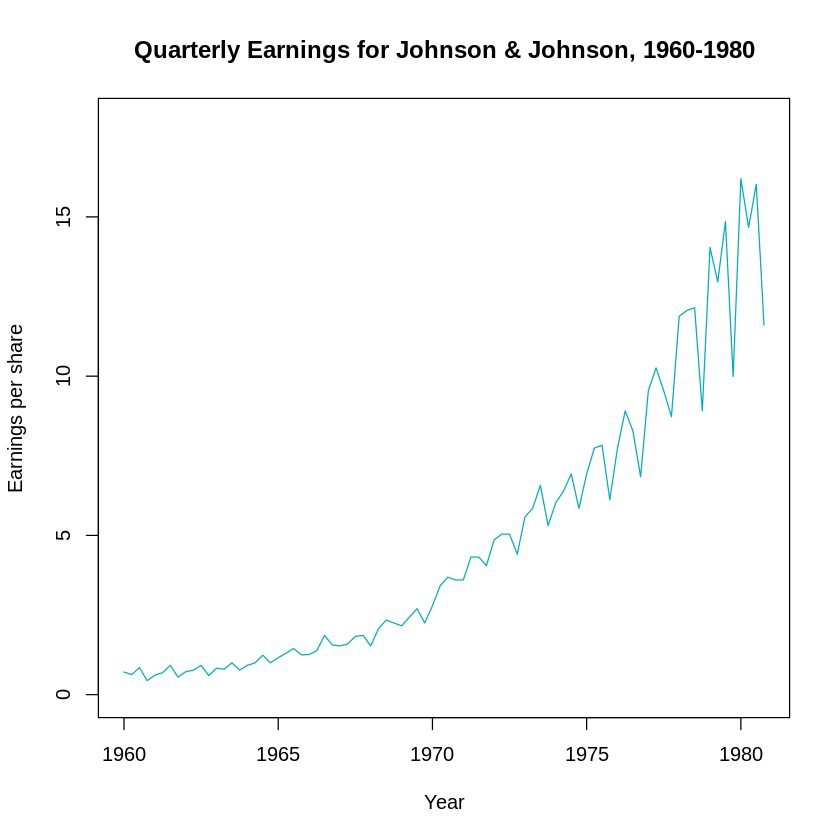

In [ ]:
# Time plot of Johnson & Johnson quarterly series
plot.ts( jj.t, ylim=c(0,18), col="#00AFBB", xlab="Year", ylab="Earnings per share",
         main="Quarterly Earnings for Johnson & Johnson, 1960-1980" )

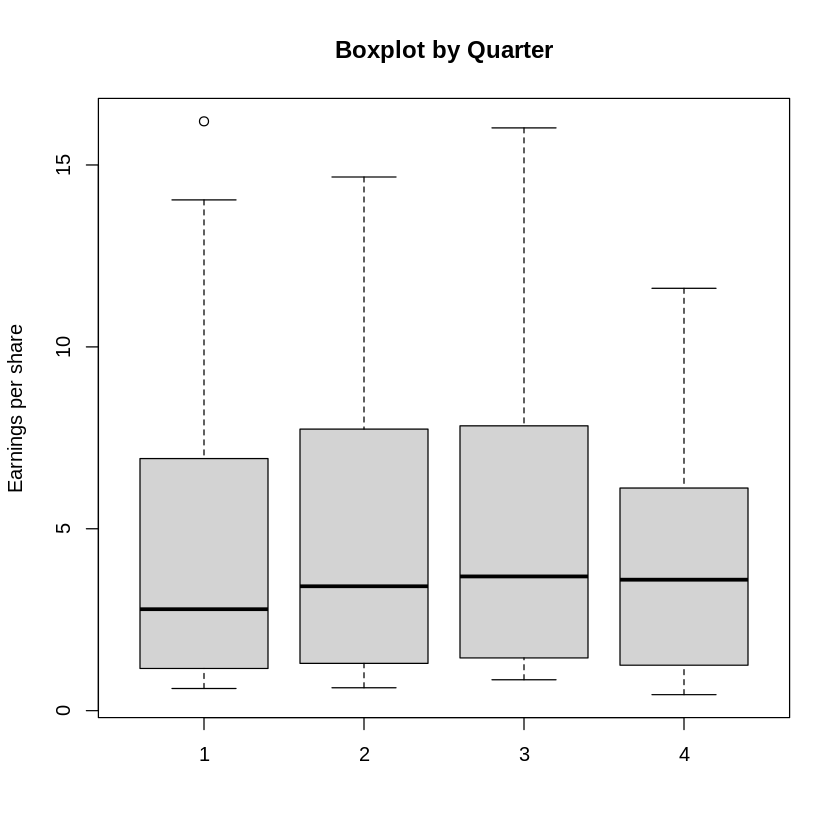

In [ ]:
# Boxplot by quarter with Johnson & Johnson series
jj_mtr <- matrix( jj.t, ncol=4, byrow=TRUE )
boxplot( split( jj_mtr, col(jj_mtr) ), ylab="Earnings per share", main="Boxplot by Quarter" )

<font color="blue">**Answer to part 3**</font>. The time plot displays nonstationary features in the series. The earning series shows increasing variance, growing trend, and varying means for each quarter (periodicities).

<font color="red">**Part 4: Transformation**</font> (4 points). (i) **Take a logarithm** of the Johnson \& Johnson series. (ii) **Make a time plot of the log-transformed series**. (iii) **Make a boxplot by quarter with the log-transformed series**. (iv) **Comment** if the log-transformation is effective for variance stabilization with the Johnson \& Johnson series.

In [ ]:
# Log-transformation of the Johnson & Johnson series
ljj.t <- log( jj.t )

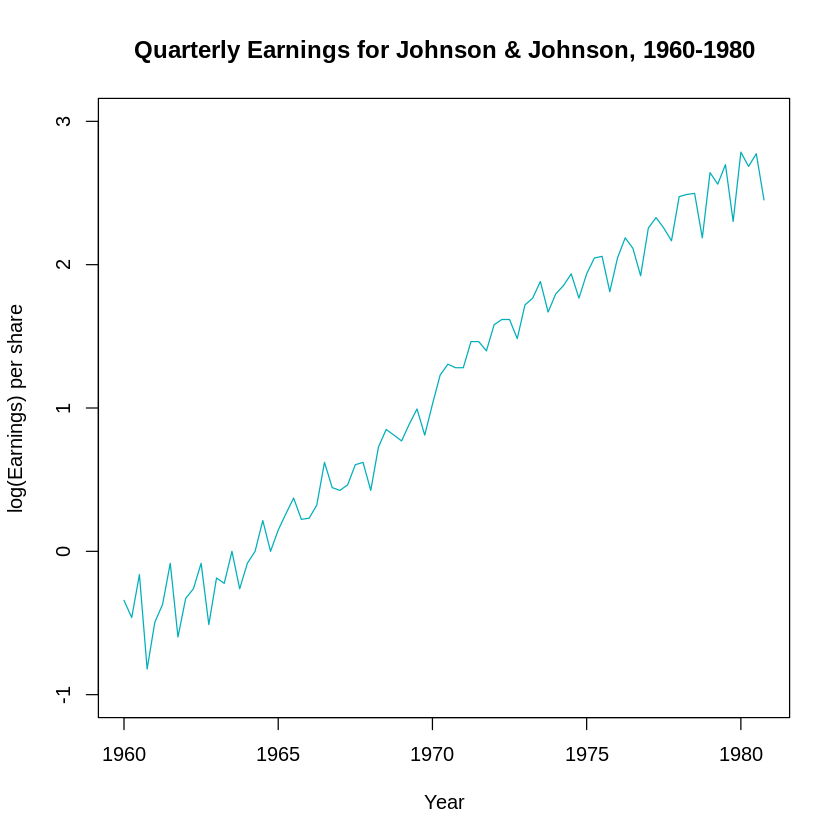

In [ ]:
# Time plot of log-transformed Johnson & Johnson quarterly series
plot.ts( ljj.t, ylim=c(-1,3), col="#00AFBB", xlab="Year", ylab="log(Earnings) per share",
         main="Quarterly Earnings for Johnson & Johnson, 1960-1980" )

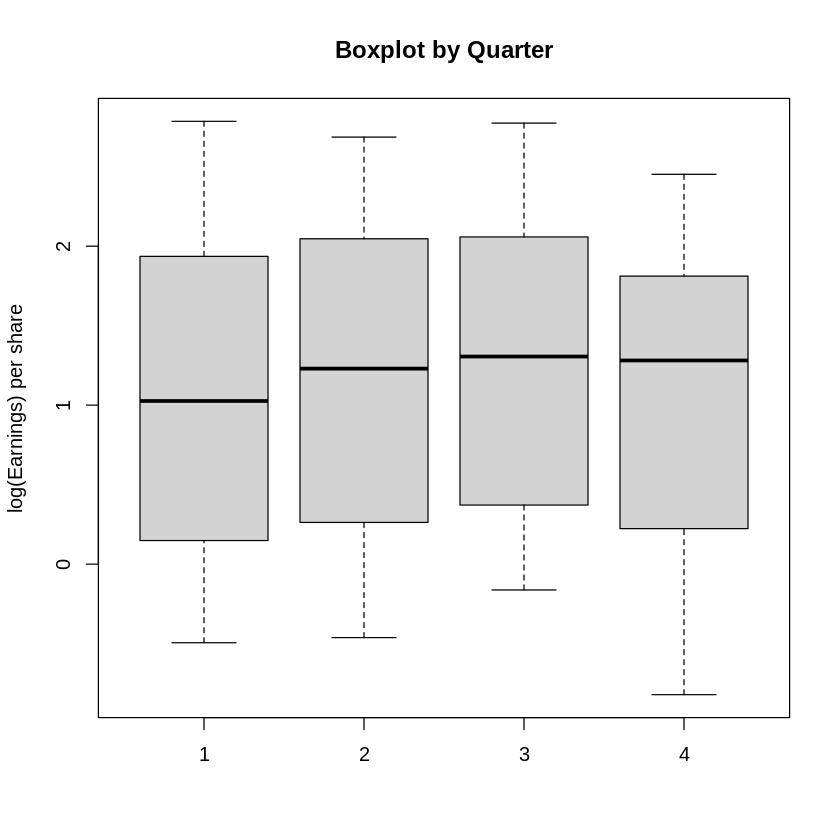

In [ ]:
# Boxplot by quarter with log-transformed Johnson & Johnson quarterly series
ljj_mtr <- matrix( ljj.t, ncol=4, byrow=TRUE )
boxplot( split( ljj_mtr, col(ljj_mtr) ), ylab="log(Earnings) per share", main="Boxplot by Quarter" )

<font color="blue">**Answer to part 4**</font>. The log-transformation was done to hopefully stabilize the variance and make the series more normally distributed. The time plot shows that the log-transformation indeed helps the variance stabilization. The quarterly average earnings do not look to be drastically different.

### <font color="#0066B2">**Approach 1: Regression**</font>

<font color="red">**Part 5: Regression for linear trend and quarterly effects**</font> (0 points). Suppose $V_t$ denotes the Johnson \& Johnson series at time $t$. Let $X_t = \log(V_t)$. Fit the regression model

\begin{equation*}
X_t = \beta \, t+\alpha_{1}Q_{t1}+\alpha_{2}Q_{t2}+\alpha_{3}Q_{t3}
    + \alpha_{4}Q_{t4} + U_{t},
\end{equation*}

where $Q_{ti}=1$ if time $t$ corresponds to quarter $i=1,2,3,4$, and zero otherwise. We will assume for now that $U_t$ is a mean-zero Gaussian white noise sequence.

<font color="blue">**[1] Interpretation of $\beta$**</font>: First, recall that

`jj.t <- ts( df.jj$jj, start=c(1960,1), freq=4 )`

The variable `jj.t` is a time-formatted series variable. To make the time variable $t$ in regression corresponding to actual year, let's use

`time( ljj.t )`

for the time variable $t$, setting $t = 1960, 1960.25, \ldots, 1980.75$. That is, $t$ increases by 0.25 from one quarter to next quarter and by 1 from a year to next year.

Furthermore, note that if $t=1960$, then the quarter indicators are determined as follows: $Q_{t1}=1$, and $Q_{t2} = Q_{t3} = Q_{t4} = 0$, because the `ljj.t` value corresponding to $t=1960$ is recorded for quarter 1. Similarly, if $t=1960.25$, then $Q_{t2}=1$, and $Q_{t1} = Q_{t3} = Q_{t4} = 0$.

Under these settings, we interpret the parameter $\beta$. The mean of the annual increase of $X_t$ for quarter 1 can be expresed as

\begin{equation*}
E(X_t - X_{t - 1})
= E(X_t) - E(X_{t - 1})
= [\beta t + \alpha_1] - [\beta (t-1) + \alpha_1]
= \beta
\end{equation*}

This result also holds true for other quarters. Therefore, <font color="green">**$\beta$ represents the expected change in $X_t$ in every year**</font>.

<font color="blue">**[2] Interpretation of $\alpha_i$'s**</font>: First, we define $T_i$ as a set of all times $t$ corresponding to quarter $i$ and consider

\begin{equation*}
E\left(\frac{1}{d}\sum_{t \in T_i}X_{t}\right)
= \frac{1}{d}\sum_{t \in T_i}E(X_t)
= \frac{1}{d}\sum_{t \in T_i}[\beta t + \alpha_i]
= \frac{\beta}{d}\sum_{t \in T_i}t + \frac{1}{d}(d\alpha_i)
= \frac{\beta}{d}\sum_{t \in T_i}t + \alpha_i,
\end{equation*}

where $d$ represents the number of full years in the series. Now, if we decenter time variable $t$ by subtracting the mean of times, the previous expression can be

\begin{equation*}
E\left(\frac{1}{d}\sum_{t \in T_i}X_{t}\right)
= \frac{\beta}{d}\sum_{t \in T_i}(t - \bar{t}) + \alpha_i
\approx \frac{\beta}{d} \cdot 0 + \alpha_i
= \alpha_i.
\end{equation*}

Therefore, <font color="green">**$\alpha_i$ represents the expected value of the average of $X_t$ values for quarter $i$**</font> for $i=1,2,3,4$.

<font color="red">**Part 6: Fit the regression model to estimate linear trend and quarterly effects**</font> (4 points). Fit the regression model in part 5. (*Hint: Below is an example of R codes for this regression model fit. You are welcome to modify these codes for your convention. In addition, you are strongly recommended to run each code block at a time and verify the result.*)

In [ ]:
# Compute number of years
n <- length( ljj.t )               # n   : no of observations
n_yrs <- n/4                       # n_yrs: no of years
n_yrs

[1] 21

In [ ]:
# Define the time predictors for regression model
time <- time( ljj.t ) - 1970       # centered time
Q <- factor( rep( 1:4, n_yrs) )    # quarter factors

In [ ]:
# Fit regression model without intercept
m1 <- lm( ljj.t ~ 0 + time + Q )   # include "0" for "no-intercept" model
head( model.matrix( m1 ) )         # model (design) matrix

,time,Q1,Q2,Q3,Q4
1,-10.00,1,0,0,0
2,-9.75,0,1,0,0
3,-9.50,0,0,1,0
4,-9.25,0,0,0,1
5,-9.00,1,0,0,0
6,-8.75,0,1,0,0


In [ ]:
# Print fitted regression model
summary( m1 )      # Caution: standard errors are calculated under independence assumption


Call:
lm(formula = ljj.t ~ 0 + time + Q)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29318 -0.09062 -0.01180  0.08460  0.27644 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
time 0.167172   0.002259   74.00   <2e-16 ***
Q1   1.052793   0.027359   38.48   <2e-16 ***
Q2   1.080916   0.027365   39.50   <2e-16 ***
Q3   1.151024   0.027383   42.03   <2e-16 ***
Q4   0.882266   0.027412   32.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1254 on 79 degrees of freedom
Multiple R-squared:  0.9935,	Adjusted R-squared:  0.9931 
F-statistic:  2407 on 5 and 79 DF,  p-value: < 2.2e-16


<font color="red">**Part 7: Interpretation of the fitted regression model**</font> (4 points). (i) **Express** the fitted regression model. (ii) **Interpret** the estimated regression coefficients $\widehat{\beta}, \widehat{\alpha}_1, \widehat{\alpha}_2, \widehat{\alpha}_3, \widehat{\alpha}_4$.

<font color="blue">**Answer to part 7**</font>. The fitted model is expressed as

\begin{equation*}
\widehat{X}_t
= 0.1672 \, t + 1.0528 Q_{t1} + 1.0809 Q_{t2} + 1.1510 Q_{t3} + 0.8823 Q_{t4}
\end{equation*}

The interpretation of the parameters $\beta$, $\alpha_1$, $\alpha_2$, $\alpha_3$, $\alpha_4$ are as follows.

* $\widehat{\beta} = 0.1672$: Johnson \& Johnson expects their logged earnings to increase by 0.1672 dollars per share every year.
* $\widehat{\alpha}_1 = 1.0528$: Johnson \& Johnson expects their Quarter 1 logged earnings to be 1.0528 dollars per share.
* $\widehat{\alpha}_2 = 1.0809$: Johnson \& Johnson expects their Quarter 2 logged earnings to be 1.0809 dollars per share.
* $\widehat{\alpha}_3 = 1.1510$: Johnson \& Johnson expects their Quarter 3 logged earnings to be 1.0528 dollars per share.
* $\widehat{\alpha}_4 = 0.8823$: Johnson \& Johnson expects their Quarter 4 logged earnings to be 0.8823 dollars per share.

<font color="red">**Part 8: An alternative regression model**</font> (4 points). What happens if we include an intercept term in the model in part 5? (i) **Write an identifiable regression model** with intercept term. (ii) **Fit** this regression model with the log-transformed series. (iii) **Interpret** the estimated regression parameters of this fitted intercept model.

In [ ]:
# Regression model fit with intercept
m2 <- lm( ljj.t ~ 1 + time + Q )     # include "1" for "intercept" model
head( model.matrix( m2 ) )           # model (design) matrix

,(Intercept),time,Q2,Q3,Q4
1,1,-10.00,0,0,0
2,1,-9.75,1,0,0
3,1,-9.50,0,1,0
4,1,-9.25,0,0,1
5,1,-9.00,0,0,0
6,1,-8.75,1,0,0


In [ ]:
# Print fitted regression model
summary( m2 )      # Caution: standard errors are calculated under independence assumption


Call:
lm(formula = ljj.t ~ 1 + time + Q)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29318 -0.09062 -0.01180  0.08460  0.27644 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.052793   0.027359  38.480  < 2e-16 ***
time         0.167172   0.002259  73.999  < 2e-16 ***
Q2           0.028123   0.038696   0.727   0.4695    
Q3           0.098231   0.038708   2.538   0.0131 *  
Q4          -0.170527   0.038729  -4.403 3.31e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1254 on 79 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9852 
F-statistic:  1379 on 4 and 79 DF,  p-value: < 2.2e-16


<font color="blue">**Answer to part 8**</font>. An alternative regression model is

\begin{equation*}
X_t
= \alpha_0 + \beta \, t + \alpha_{2} Q_{t2} + \alpha_{3}Q_{t3} + \alpha_{4}Q_{t4} + U_{t}.
\end{equation*}

The fitted model `m2` is

\begin{equation*}
\widehat{X}_t
= 1.0528 + 0.1672 \, t + 0.0281 Q_{t2} + 0.0982 Q_{t3} - 0.1705 Q_{t4}.
\end{equation*}


The value of $\widehat{\beta}$ is the same for the two regression models `m1` and `m2`.

Also, note that $\widehat{\alpha}_0$ in the intercept model `m2` is the same as $\widehat{\alpha}_1$ in the no-intercept model `m1`. That is, $\alpha_0$ in `m2` represents the expected logged earnings $X_t$ for Quarter 1.

However, the value of other $\widehat{\alpha}_{i}$, $i=2,3,4$, is different for the no-intercept model `m1` and the intercept model `m2`. The estimate $\widehat{\alpha}_{i}$ in `m2` represents the Quarter $i$ expected difference of logged earnings from the Quarter 1 baseline logged earnings. Specifically, $\widehat{\alpha}_{2} = 0.0281$ in `m2` indicates that the Quarter 2 expected logged earnings is higher than the Quarter 1 expected logged earnings by 0.0281 dollars per share. This interpretation matches the result in `m1`, where the Quarter 2 expected logged earnings $\widehat{\alpha}_{2} = 1.0809$ is explained by the Quarter 1 expected logged earnings plus the change of the expected logged earnings from Quarter 1 to Quarter 2, $\widehat{\alpha}_{0} + \widehat{\alpha}_{2} = 1.0528 + 0.0281 = 1.0809$.

In summary, due to inclusion of an intercept term, the meanings of the $\alpha_i$ parameters are different. However, we can get an equivalent result from one model to the other. In addition, the goodness of fit statistcs, such as residual stanard error values, $R^2$ and adjusted $R^2$ values, remain the same.

<font color="red">**Part 9: Fitted model and residuals visualization**</font> (4 points). (i) **Graph** the log-transformed data $X_t$ and **superimpose** the fitted values, say $\widehat{X}_t$, on the same graph. (ii) **Make a time plot** of the residual series $X_t-\widehat{X}_t$. (iii) **Explain** if the model fits the data well. Do the residual series look to be stationary?

In [ ]:
# Residuals and predicted series
ljj.t_rsd <- ts( m1$resid, start=c(1960,1), freq=4 )
ljj.t_prd <- ts( m1$fit, start=c(1960,1), freq=4 )

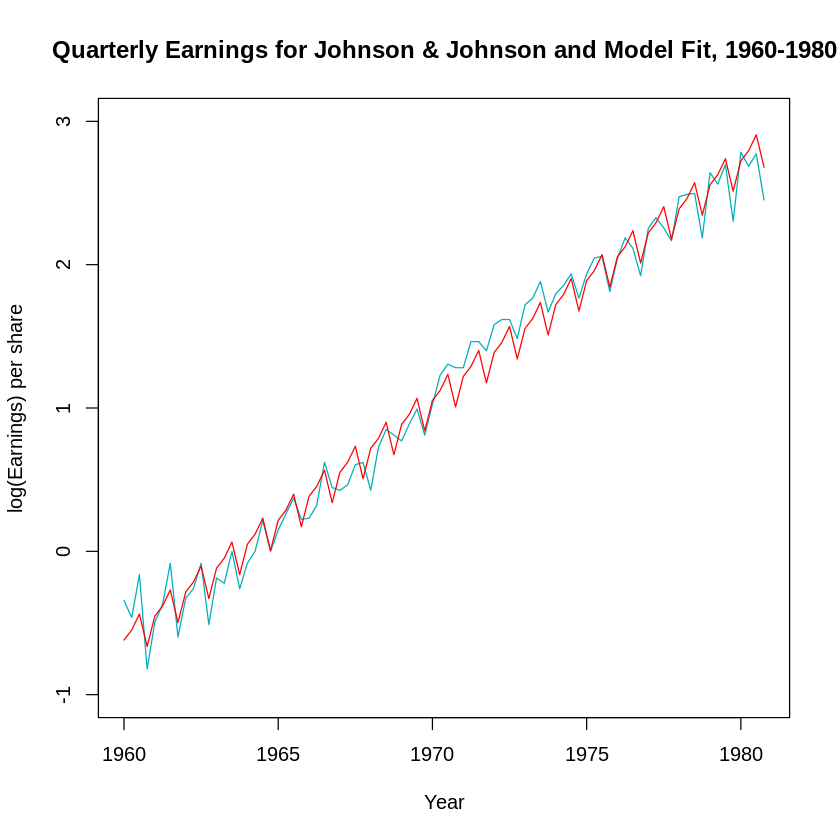

In [ ]:
# Time plot of log-transformed series and its prediction
plot.ts( ljj.t, ylim=c(-1,3), col="#00AFBB", xlab="Year", ylab="log(Earnings) per share",
         main="Quarterly Earnings for Johnson & Johnson and Model Fit, 1960-1980" )
lines( ljj.t_prd, col="red", lty="solid" )

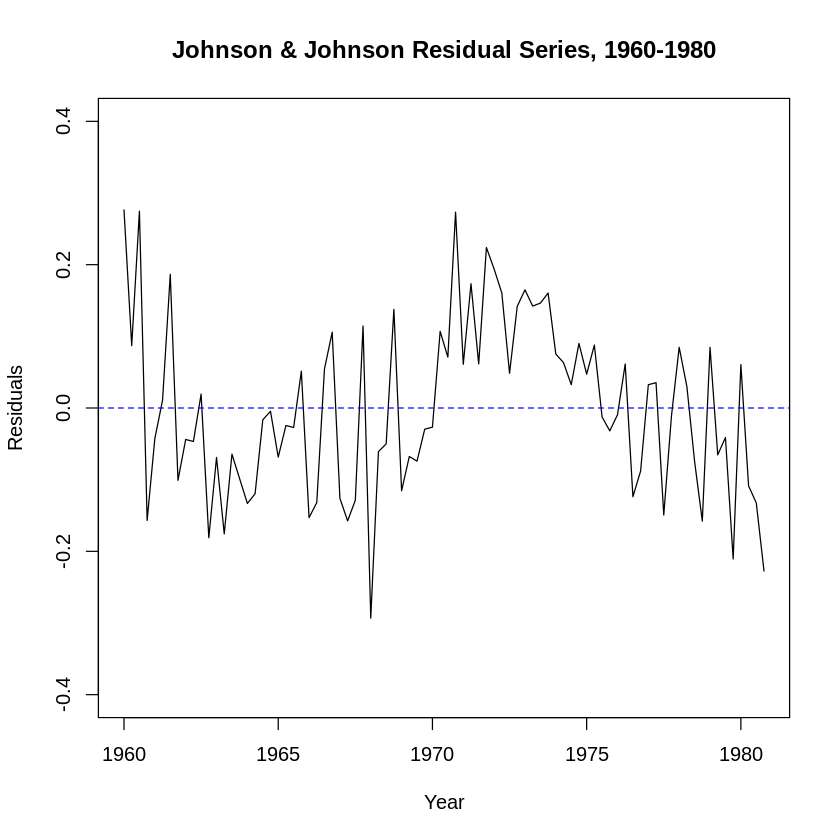

In [ ]:
# Time plot of residual series
plot.ts( ljj.t_rsd, ylim=c(-0.4,0.4), xlab="Year", ylab="Residuals",
         main="Johnson & Johnson Residual Series, 1960-1980" )
abline( h=mean(ljj.t_rsd), col="blue", lty="dashed" )

<font color="blue">**Answer to part 9**</font>. It appears that the residual series is rather not stationary due to a wave pattern, but this pattern is not that strong.

### <font color="#0066B2">**Approach 2: Differencing**</font>

<font color="red">**Part 10: Differencing**</font> (6 points). (i) **Find adequate differencings** for $X_t$ that eliminate trend and seasonal components so that the differenced $X_t$ appears to be stationary. (ii) **Write** your conclusion.

In [ ]:
# Eliminate seasonal components by lag-4 differencing
ljj.t_dif.4 <- diff( ljj.t,4 )
ljj.t_dif.4                  # notice the differenced series values are not calculated for the 1st year 1960

,Qtr1,Qtr2,Qtr3,Qtr4
1961,-0.15180601,0.09097178,0.07913732,0.22314355
1962,0.16579225,0.10969892,0.00000000,0.08701138
1963,0.14217449,0.03822121,0.08338161,0.24946086
1964,0.10294797,0.22314355,0.21511138,0.26136476
1965,0.23180161,0.26236426,0.15645218,0.22314355
1966,0.08269172,0.05971923,0.24901293,0.22154227
1967,0.19415601,0.14165052,-0.01626052,0.17589067
1968,0.00000000,0.26381459,0.24583496,0.19035373
1969,0.34484049,0.16034265,0.14310084,0.00000000
1970,0.25593337,0.34174929,0.31237469,0.47000363


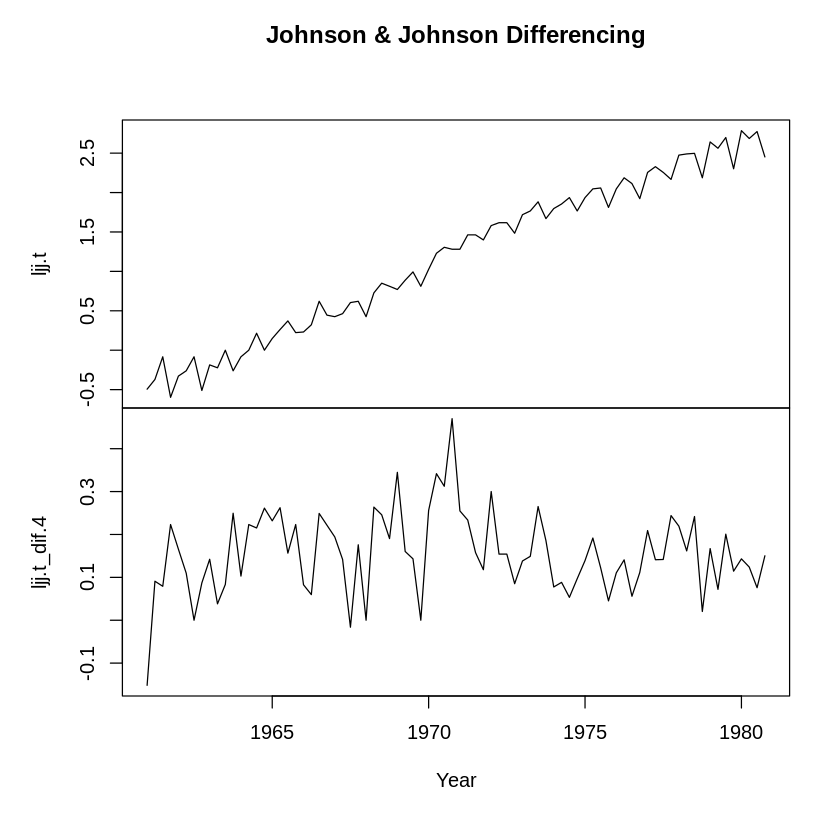

In [ ]:
# Time plot of log-transformed series and its lag-4 differenced series
plot.ts( ts.intersect( ljj.t, ljj.t_dif.4 ),
         xlab="Year",ylab="log(Earnings) per share", main="Johnson & Johnson Differencing")

In [ ]:
# Lag-1 differencing of lag-4 differenced series
ljj.t_dif.1.4 <- diff( diff( ljj.t,4 ),1 )
ljj.t_dif.1.4        # notice the 1st value in 1961 is not calculated due to lag-1 differencing

,Qtr1,Qtr2,Qtr3,Qtr4
1961,,0.2427777911,-0.0118344576,0.1440062308
1962,-0.0573512965,-0.0560933376,-0.1096989173,0.0870113770
1963,0.0551631118,-0.1039532760,0.0451603961,0.1660792507
1964,-0.1465128904,0.1201955821,-0.0080321717,0.0462533845
1965,-0.0295631501,0.0305626504,-0.1059120877,0.0666913745
1966,-0.1404518355,-0.0229724811,0.1892936966,-0.0274706613
1967,-0.0273862555,-0.0525054974,-0.1579110379,0.1921511873
1968,-0.1758906665,0.2638145910,-0.0179796285,-0.0554812340
1969,0.1544867578,-0.1844978362,-0.0172418064,-0.1431008436
1970,0.2559333741,0.0858159196,-0.0293746087,0.1576289442


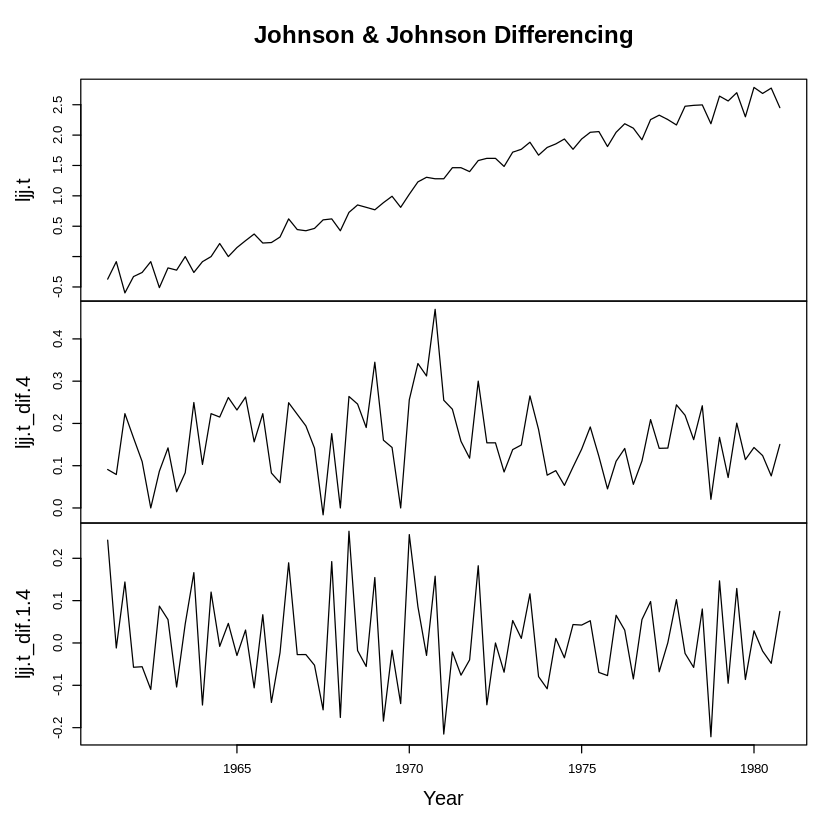

In [ ]:
# Time plot of log-transformed series, lag-4 differenced series, and lag-4-and-lag-1 differenced series
plot.ts( ts.intersect( ljj.t, ljj.t_dif.4, ljj.t_dif.1.4 ),
         xlab="Year",ylab="log(Earnings) per share", main="Johnson & Johnson Differencing" )

<font color="blue">**Answer to part 10**</font>. (Answers may vary.) $\nabla\nabla_4 x_t$ could be most likely stationary. I am not certain about $\nabla_4 x_t$, due to a slight linear trend in the lag-4 differenced series.